# Project: Analysis of NYC Yellow Taxi Data

### Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 2: Load and Explore the Data

In [ ]:
url = 'https://data.cityofnewyork.us/resource/Yellow_Taxi_Trip_data.csv'
df = pd.read_csv(url)
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01T00:32:10.000,2023-01-01T00:40:36.000,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01T00:55:08.000,2023-01-01T01:01:27.000,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01T00:25:04.000,2023-01-01T00:37:49.000,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01T00:03:48.000,2023-01-01T00:13:25.000,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01T00:10:29.000,2023-01-01T00:21:19.000,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


## Feature description

The columns from the 2023 Yellow Taxi Trip Data are structured to capture key aspects of taxi trips in New York City. Here is a detailed description of each column:

1. **VendorID**
   - **API Field Name**: `vendorid`
   - **Data Type**: Number
   - **Description**: Identifies the vendor providing the trip. Common values are codes for specific taxi providers, used for tracking and reporting.

2. **tpep_pickup_datetime**
   - **API Field Name**: `tpep_pickup_datetime`
   - **Data Type**: Floating Timestamp
   - **Description**: The date and time when the taxi trip began, with precise timestamp information.

3. **tpep_dropoff_datetime**
   - **API Field Name**: `tpep_dropoff_datetime`
   - **Data Type**: Floating Timestamp
   - **Description**: The date and time when the taxi trip ended, marking the end time of the trip.

4. **passenger_count**
   - **API Field Name**: `passenger_count`
   - **Data Type**: Number
   - **Description**: Number of passengers in the taxi during the trip, as recorded by the driver or dispatch.

5. **trip_distance**
   - **API Field Name**: `trip_distance`
   - **Data Type**: Number
   - **Description**: Distance covered in the trip, usually in miles, based on the taxi meter reading.

6. **RatecodeID**
   - **API Field Name**: `ratecodeid`
   - **Data Type**: Number
   - **Description**: Code indicating the rate of the trip, such as standard, flat, negotiated fare, or other rate types specific to NYC.

7. **store_and_fwd_flag**
   - **API Field Name**: `store_and_fwd_flag`
   - **Data Type**: Text
   - **Description**: Indicates if the trip record was stored and forwarded due to lack of signal (`Y` for yes, `N` for no).

8. **PULocationID**
   - **API Field Name**: `pulocationid`
   - **Data Type**: Number
   - **Description**: Unique identifier for the location where the passenger was picked up, mapped to zones.

9. **DOLocationID**
   - **API Field Name**: `dolocationid`
   - **Data Type**: Number
   - **Description**: Unique identifier for the location where the passenger was dropped off, also mapped to zones.

10. **payment_type**
    - **API Field Name**: `payment_type`
    - **Data Type**: Number
    - **Description**: Code for the payment method used for the trip, such as cash, credit card, or digital payment.

11. **fare_amount**
    - **API Field Name**: `fare_amount`
    - **Data Type**: Number
    - **Description**: Base fare for the trip, as calculated by the taxi meter based on time and distance.

12. **extra**
    - **API Field Name**: `extra`
    - **Data Type**: Number
    - **Description**: Additional charges, such as rush-hour surcharges, added to the base fare.

13. **mta_tax**
    - **API Field Name**: `mta_tax`
    - **Data Type**: Number
    - **Description**: Fixed Metropolitan Transportation Authority (MTA) tax added to each trip within NYC.

14. **tip_amount**
    - **API Field Name**: `tip_amount`
    - **Data Type**: Number
    - **Description**: Tip given by the passenger, either as a cash or credit tip.

15. **tolls_amount**
    - **API Field Name**: `tolls_amount`
    - **Data Type**: Number
    - **Description**: Amount of tolls paid during the trip, applicable if toll bridges or tunnels were used.

16. **improvement_surcharge**
    - **API Field Name**: `improvement_surcharge`
    - **Data Type**: Number
    - **Description**: Surcharge collected for NYC’s Taxi Improvement Fund.

17. **total_amount**
    - **API Field Name**: `total_amount`
    - **Data Type**: Number
    - **Description**: The overall fare for the trip, which includes the base fare, surcharges, taxes, tips, and tolls.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               1000 non-null   int64  
 1   tpep_pickup_datetime   1000 non-null   object 
 2   tpep_dropoff_datetime  1000 non-null   object 
 3   passenger_count        1000 non-null   float64
 4   trip_distance          1000 non-null   float64
 5   ratecodeid             1000 non-null   float64
 6   store_and_fwd_flag     1000 non-null   object 
 7   pulocationid           1000 non-null   int64  
 8   dolocationid           1000 non-null   int64  
 9   payment_type           1000 non-null   int64  
 10  fare_amount            1000 non-null   float64
 11  extra                  1000 non-null   float64
 12  mta_tax                1000 non-null   float64
 13  tip_amount             1000 non-null   float64
 14  tolls_amount           1000 non-null   float64
 15  impro

In [4]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [5]:
mapping = {'N': 0, 'Y': 1}
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(mapping)

### Step 3: Data Preprocessing


### Feature engineering

In [6]:
# Convert datetime columns to datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [7]:
df['trip_duration']

,trip_duration
0,8.433333
1,6.316667
2,12.750000
3,9.616667
4,10.833333
...,...
995,9.483333
996,0.100000
997,30.733333
998,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vendorid               1000 non-null   int64         
 1   tpep_pickup_datetime   1000 non-null   datetime64[ns]
 2   tpep_dropoff_datetime  1000 non-null   datetime64[ns]
 3   passenger_count        1000 non-null   float64       
 4   trip_distance          1000 non-null   float64       
 5   ratecodeid             1000 non-null   float64       
 6   store_and_fwd_flag     1000 non-null   int64         
 7   pulocationid           1000 non-null   int64         
 8   dolocationid           1000 non-null   int64         
 9   payment_type           1000 non-null   int64         
 10  fare_amount            1000 non-null   float64       
 11  extra                  1000 non-null   float64       
 12  mta_tax                1000 non-null   float64       
 13  tip_

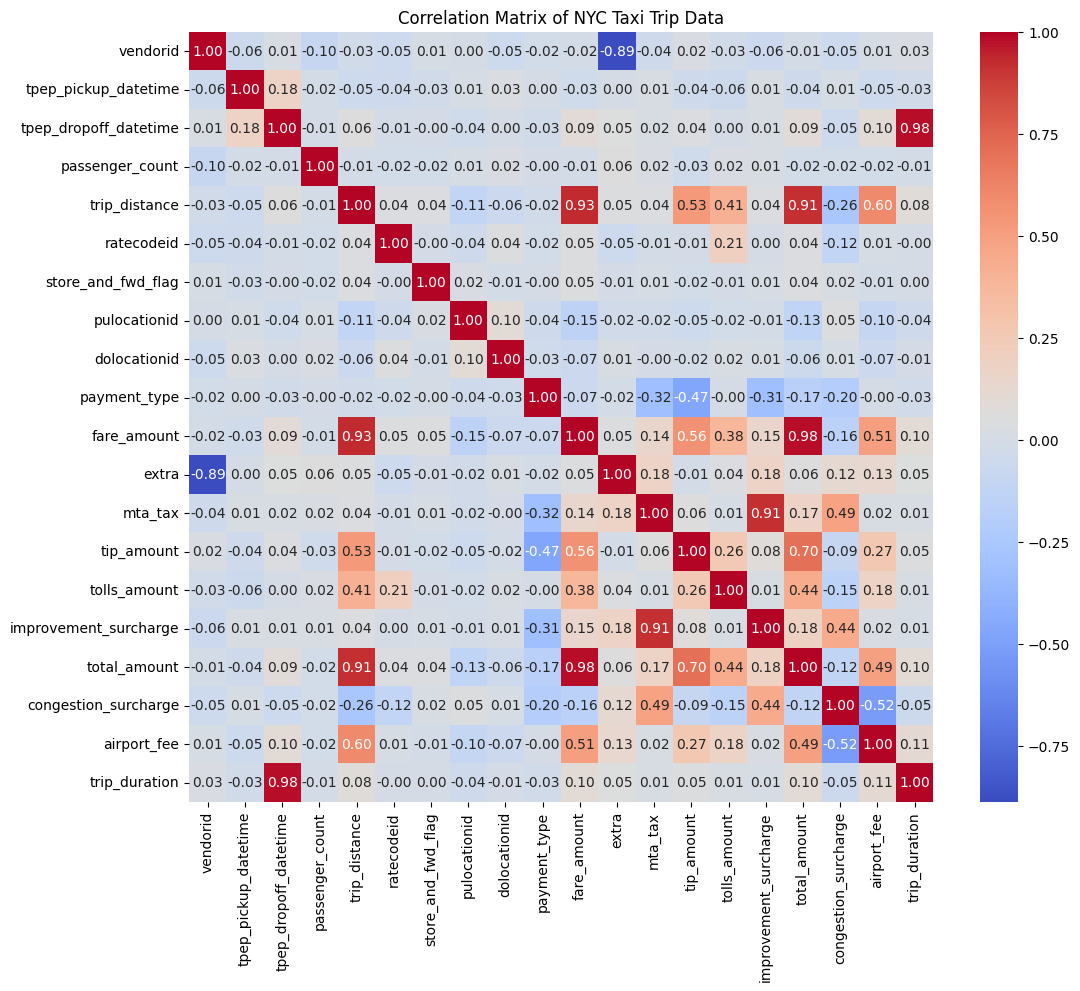

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NYC Taxi Trip Data')
plt.show()

## feature notes
##### Vendor ID and extra charges correlate -0.89
##### passenger count and fare rate have no correlation at all
##### Trip distance and fare amount 0.93, total amount also correlate 0.91
##### total amount and fare amount 0.98 correlation

In [10]:
df.drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','airport_fee','congestion_surcharge','fare_amount','tpep_dropoff_datetime','tpep_pickup_datetime'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendorid            1000 non-null   int64  
 1   passenger_count     1000 non-null   float64
 2   trip_distance       1000 non-null   float64
 3   ratecodeid          1000 non-null   float64
 4   store_and_fwd_flag  1000 non-null   int64  
 5   pulocationid        1000 non-null   int64  
 6   dolocationid        1000 non-null   int64  
 7   payment_type        1000 non-null   int64  
 8   total_amount        1000 non-null   float64
 9   trip_duration       1000 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


In [12]:
# Drop rows with missing or invalid data
df = df.dropna()

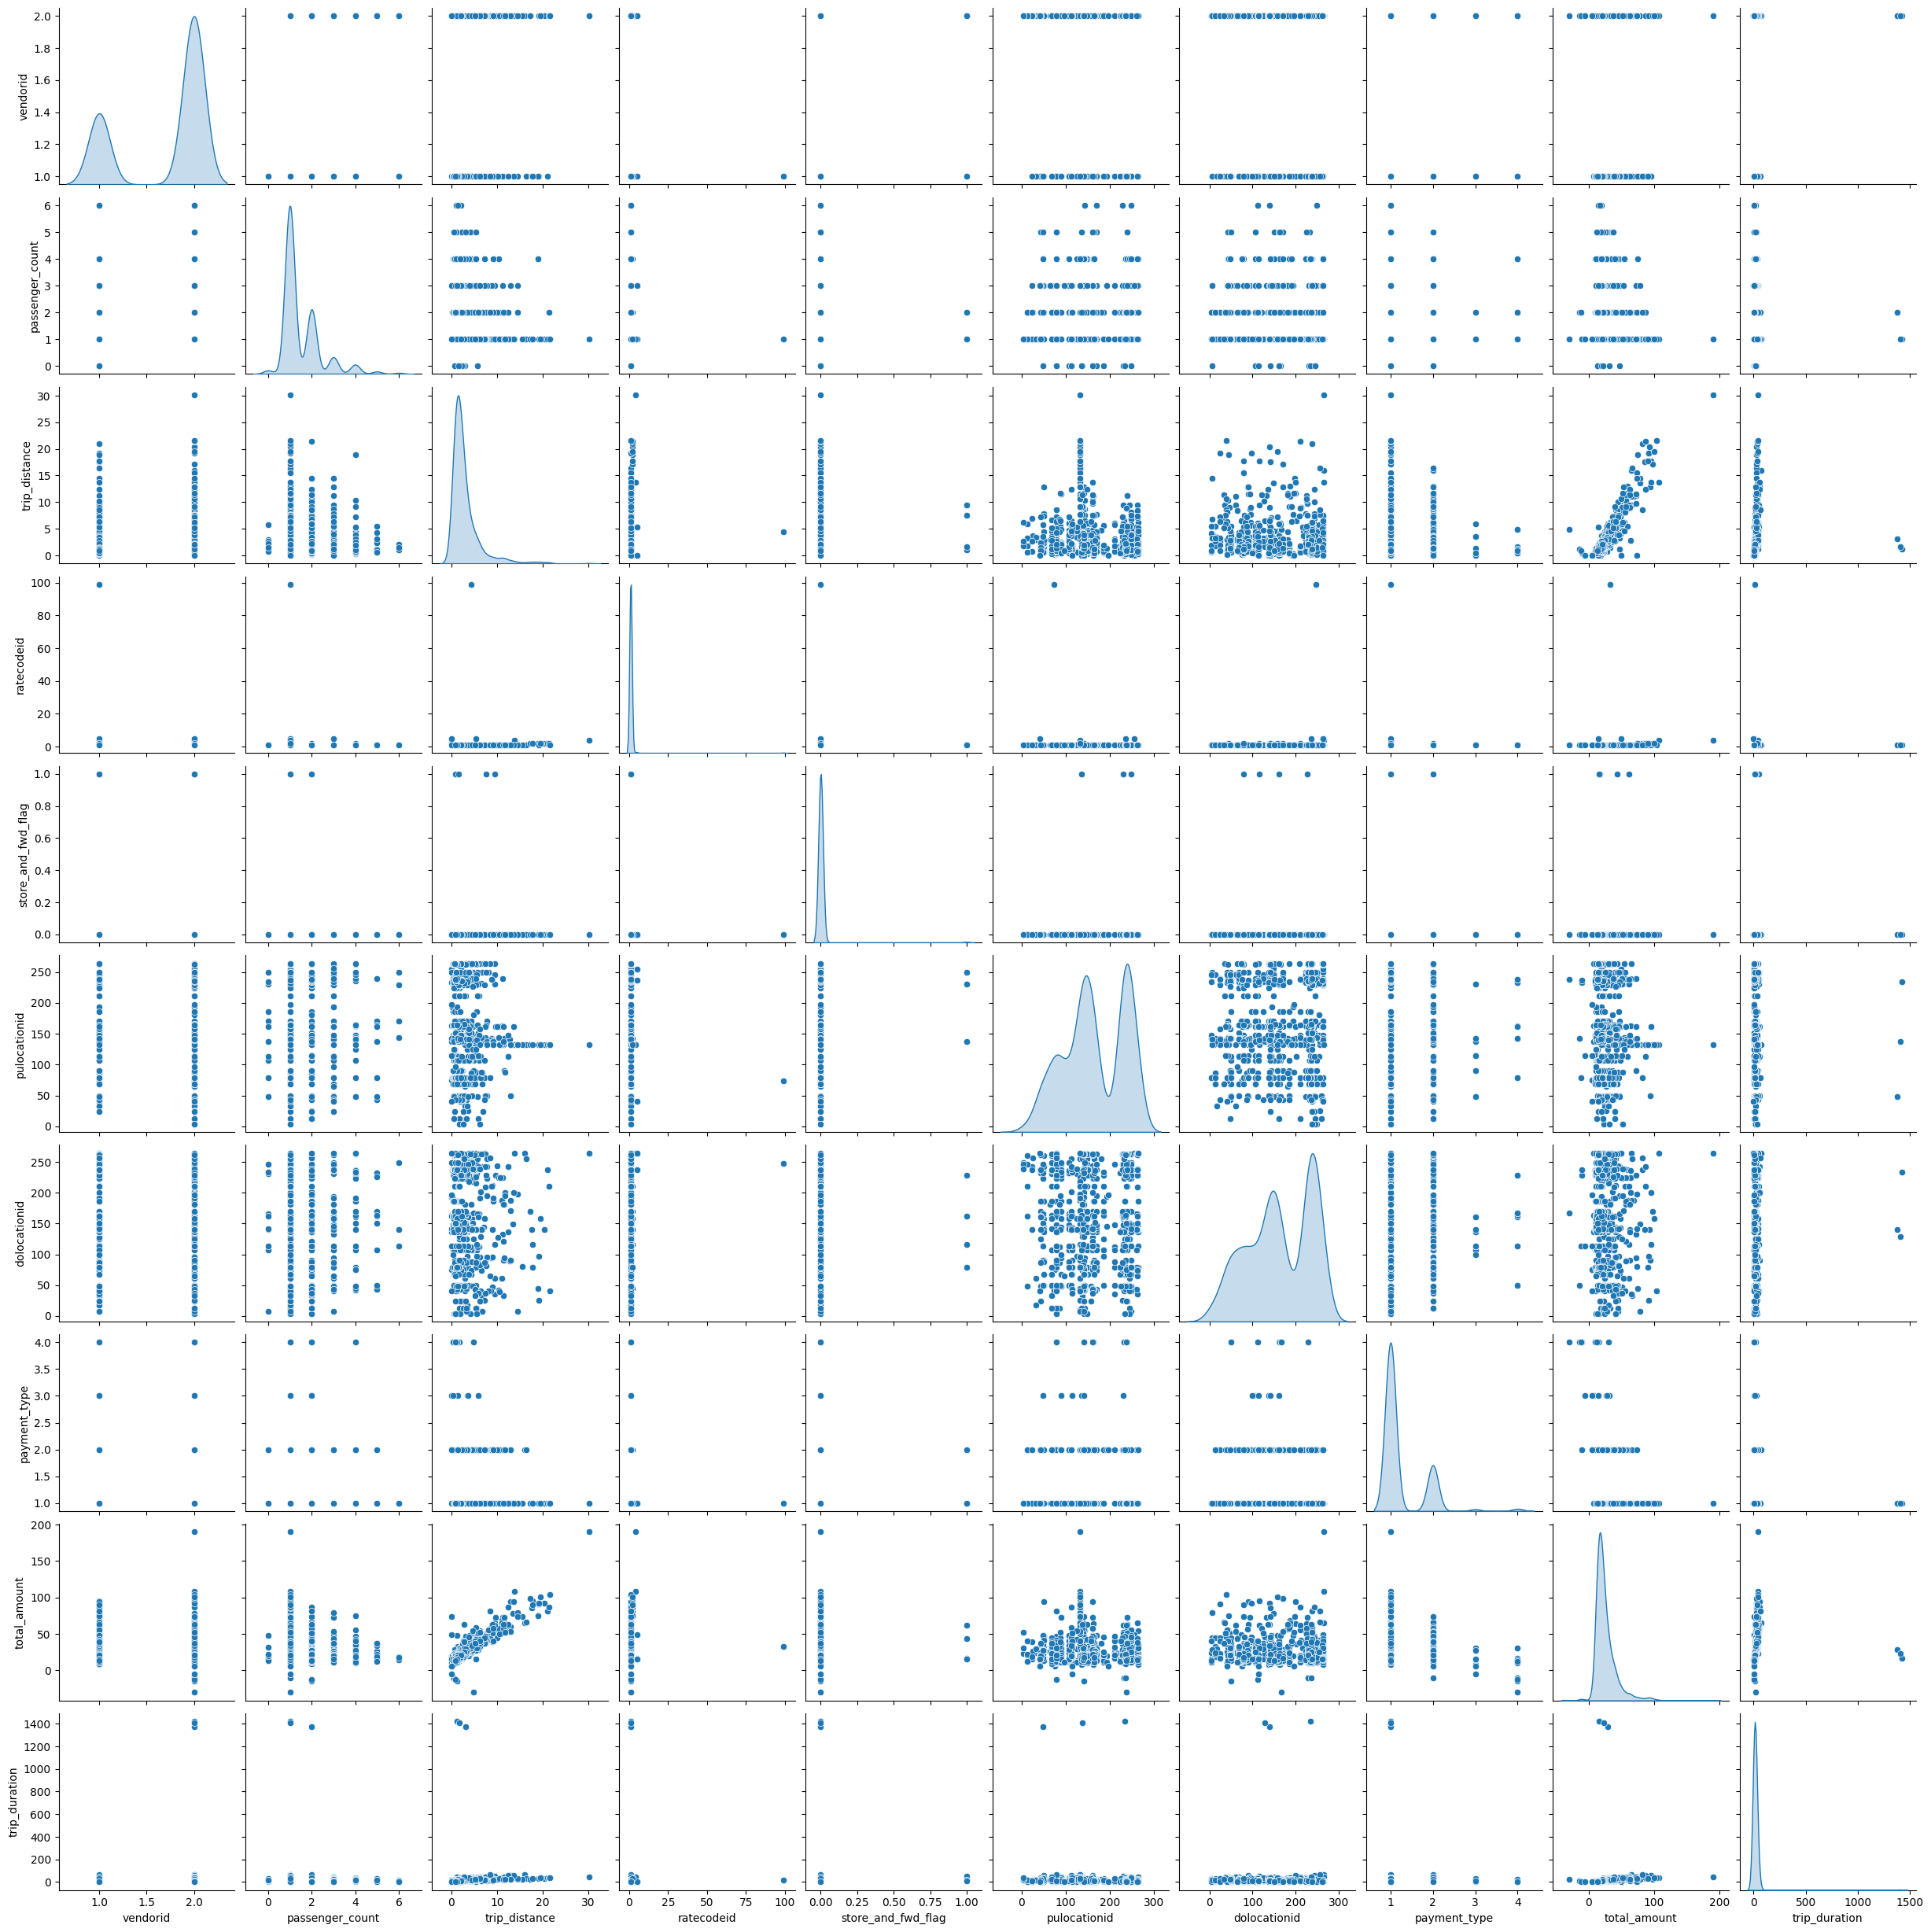

In [13]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Step 4: Creating Model

In [20]:
X = df.drop(["total_amount"],axis = 1).copy()
y = df['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])  # Mean Squared Error for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
history = model.fit(
    X_train, y_train,
    epochs=50,  # Adjust epochs based on model performance
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 946.1595 - mae: 25.5754 - val_loss: 941.1293 - val_mae: 26.4102
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 915.9900 - mae: 24.3601 - val_loss: 850.8370 - val_mae: 24.8232
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 693.6710 - mae: 21.7829 - val_loss: 711.7367 - val_mae: 22.2122
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 681.0359 - mae: 20.1313 - val_loss: 518.5424 - val_mae: 18.2072
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 480.2764 - mae: 16.0232 - val_loss: 320.6324 - val_mae: 13.3009
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283.9931 - mae: 11.3559 - val_loss: 170.5659 - val_mae: 9.1804
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.3002 - mae: 8.7433 - val_loss: 99.0504 - val_mae: 7.1591
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.8724 - mae: 7.1421 - val_loss: 69.1476 - val_mae: 6.2216
Epoch 9/50
23/23 ━━━━━━━━━━━━━

In [29]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 17.8366 - mae: 3.0239
Test Loss: 21.69
Test MAE: 3.29


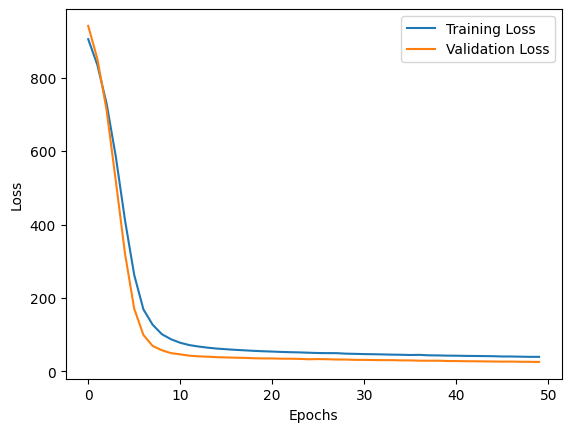

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
R² Score: 0.84
